In [66]:
import numpy as np
import pandas as pd
import seaborn

In [67]:
raw = pd.concat([
    pd.read_csv('20200625.csv', skiprows=1, parse_dates=['Settlement  Date']),
    pd.read_csv('20200629.csv', skiprows=1, parse_dates=['Settlement  Date']),
])
raw.head()

,Time Series ID,Business Type,PSR Type,Settlement Date,Settlement Period,Quantity (MW)
0,NGET-EMFIP-AGPT-TS-21611840,Production,Biomass,2020-06-25,48,3034.0
1,NGET-EMFIP-AGPT-TS-21611839,Production,Hydro Pumped Storage,2020-06-25,48,0.0
2,NGET-EMFIP-AGPT-TS-21611838,Production,Hydro Run-of-river and poundage,2020-06-25,48,249.0
3,NGET-EMFIP-AGPT-TS-21611837,Production,Fossil Hard coal,2020-06-25,48,0.0
4,NGET-EMFIP-AGPT-TS-21611836,Production,Fossil Gas,2020-06-25,48,9615.0


In [68]:
processed = raw.copy()
processed['tstamp'] = processed['Settlement  Date'] + pd.to_timedelta(processed['Settlement Period'] * 30, unit='minutes')
prod = processed.pivot('tstamp', 'PSR Type', 'Quantity (MW)').sort_index()
prod.head()

PSR Type,Biomass,Fossil Gas,Fossil Hard coal,Fossil Oil,Hydro Pumped Storage,Hydro Run-of-river and poundage,Nuclear,Other,Solar,Wind Offshore,Wind Onshore
tstamp,,,,,,,,,,,
2020-06-25 00:30:00,2426.0,9635.0,0.0,0.0,52.0,187.0,4457.0,114.0,1.0,3394.951,891.605
2020-06-25 01:00:00,2415.0,8892.0,0.0,0.0,52.0,183.0,4483.0,115.0,0.0,3326.372,903.135
2020-06-25 01:30:00,2424.0,8492.0,0.0,0.0,52.0,148.0,4468.0,115.0,1.0,3377.338,967.504
2020-06-25 02:00:00,2428.0,8252.0,0.0,0.0,52.0,145.0,4471.0,114.0,1.0,3354.477,1018.427
2020-06-25 02:30:00,2431.0,8131.0,0.0,0.0,52.0,141.0,4469.0,113.0,0.0,3061.865,1092.548


In [69]:
type_dict = {k:k.split(' ')[0] for k in prod.columns}
prod = prod.groupby(type_dict, axis='columns').sum()
prod.head()

,Biomass,Fossil,Hydro,Nuclear,Other,Solar,Wind
tstamp,,,,,,,
2020-06-25 00:30:00,2426.0,9635.0,239.0,4457.0,114.0,1.0,4286.556
2020-06-25 01:00:00,2415.0,8892.0,235.0,4483.0,115.0,0.0,4229.507
2020-06-25 01:30:00,2424.0,8492.0,200.0,4468.0,115.0,1.0,4344.842
2020-06-25 02:00:00,2428.0,8252.0,197.0,4471.0,114.0,1.0,4372.904
2020-06-25 02:30:00,2431.0,8131.0,193.0,4469.0,113.0,0.0,4154.413


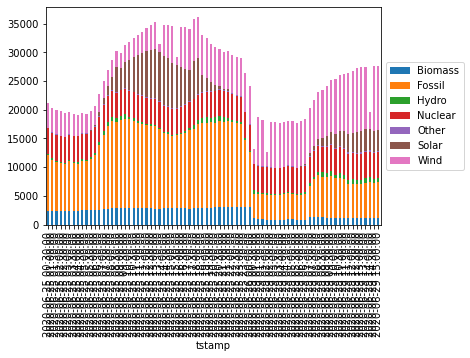

In [70]:
ax = prod.plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [71]:
prop = prod.divide(prod.sum(axis=1), axis=0)
np.round(prop.describe().loc[['min', 'mean', '50%', 'max']].T * 100, 1)

,min,mean,50%,max
Biomass,3.9,8.1,8.3,13.0
Fossil,21.6,37.6,40.8,53.4
Hydro,0.6,1.9,1.6,4.9
Nuclear,12.4,18.6,17.0,35.7
Other,0.3,0.6,0.6,1.3
Solar,0.0,8.1,4.5,27.5
Wind,4.4,25.2,21.3,44.6


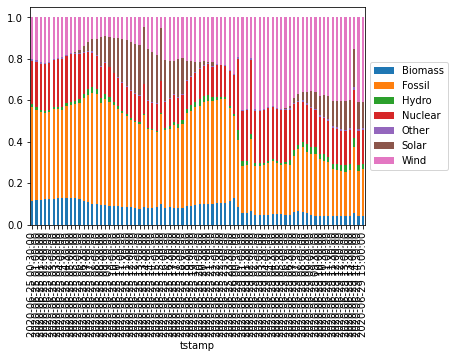

In [72]:
ax = prod.divide(prod.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))